We will take the Housing dataset which contains information about different houses in Boston. 


This data was originally a part of UCI Machine Learning Repository and has been removed now. 


We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

Link for Theory and Algorithm :https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

This is the Algorithm that is worked by numerical data so there are no classes, but we will operate the algorithm with the corellation matrix, and nearest correlated parameter.

The main theme of the 



# STEP-1 DATA ACQUASITION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This data is in structured for so we can use head, tail as csv files are structured
#bos1=pd.read_csv('housing.csv') # reading the csv datafile.
#print(bos1.tail(5))
#print(bos1)

# now we are structuring the data from raw to data frame.

from sklearn.datasets import load_boston # load_iris #
bos1 = load_boston()  #load_iris() # this is used to store the keys of dataset

# now we are converting it into dataframe.

bos2 = pd.DataFrame(bos1.data, columns=bos1.feature_names) 
bos2.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# STEP-2 FINDING THE KEYS IN  DATASET TO PREDICT 

Here to identify the keys only we use dataset.

In [2]:
print("1. THESE ARE KEYS OF DATASET") 
print(bos1.keys())
print()
print("data: contains the information for various houses")
print("target: prices of the house")
print("feature_names: names of the features")
print("DESCR: describes the dataset")

1. THESE ARE KEYS OF DATASET
dict_keys(['data', 'target', 'feature_names', 'DESCR'])

data: contains the information for various houses
target: prices of the house
feature_names: names of the features
DESCR: describes the dataset


In [3]:
print("The each component in Dataset")
print(bos1.DESCR)

The each component in Dataset
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupi

# STEP-3 FINDING THE KEYS IN  DATAFRAME TO PREDICT 

For Processing the data we use only dataset

In [4]:
print("THESE ARE KEYS OF DATAFRAME") 
print(bos2.keys()) 

THESE ARE KEYS OF DATAFRAME
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


# STEP-4 FINDING THE REQUIRED KEYS IN  DATASET TO PREDICT  

    
Here we are finding the key as  required prediction parameter, and adding that key to the dataframe as one column

In [5]:

print("The prices of the house indicated by the variable MEDV is our target variable so we predict based on this")
print()
print("The TARGET is the dependent variable which is to be predicted.")
print()
bos2["MEDV"]=bos1.target # this is the dependent variable which is to be predicted.AND CREATING THE COLUMN FOR IT
print()
# bos1["MEDV"]

The prices of the house indicated by the variable MEDV is our target variable so we predict based on this

The TARGET is the dependent variable which is to be predicted.




In [6]:
print("Best Practice to see whether this is having Null values")
print(bos2.isnull().sum()) # works for only dataframes.

Best Practice to see whether this is having Null values
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


# Step-5 Making Model

In [7]:
x=bos2.iloc[:,0:13] # this is the dataframe set 
print ("X is the independent variable directly taken from data frame")
print()
y=bos2["MEDV"] 
print ("Y is the dependent variable  taken from the target price of data set")

X is the independent variable directly taken from data frame

Y is the dependent variable  taken from the target price of data set


# Step-6 Exploratory Analysis

This is a very important step before training the model. 

In this , we will use some visualizations to understand the relationship of the target variable with other features.


Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

Here We see that the values of MEDV are distributed normally with few outliers.

E:\datasciencepandasudemy\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


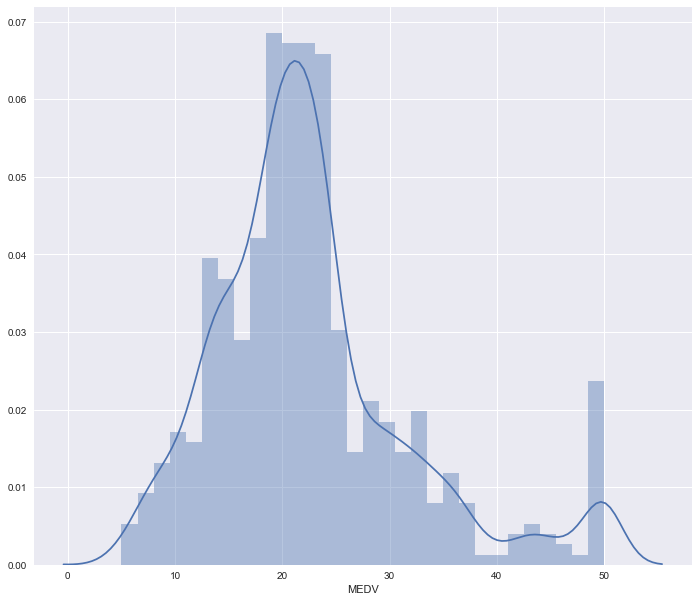

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.8,10.27)})
sns.distplot(bos2['MEDV'], bins=30)
plt.show()

# STEP-7 CORRELATION MATRIX

Correlation matrix that measures the linear relationships between the variables.

The correlation matrix can be formed by using the corr function from the pandas dataframe library. 

We will use the heatmap function from the seaborn library to plot the correlation matrix.

Here The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables.
When it is close to -1, the variables have a strong negative correlation.

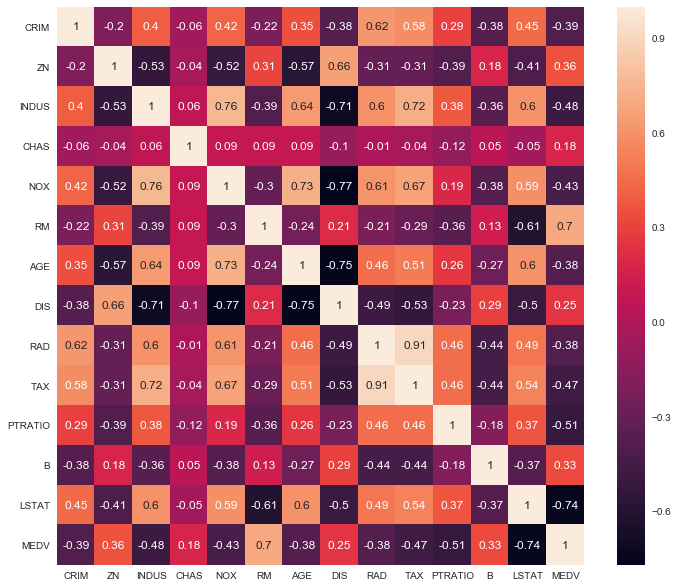

In [9]:
correlation_matrix = bos2.corr().round(2)  # works for only dataframes.
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Step- 8 Observations:


Here actually we should take Feautures that are high and low correlated with our target values, Target should be same

Now in this example, 
To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. 

By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV as  (0.7) where as LSTAT has a high negative correlation with MEDV as (-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. 

The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other.

We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

Based on the above observations we will RM and LSTAT as our features, as taking the extreme positive and negative correlation with the MEDV

Using a scatter plot let’s see how these features vary with MEDV.

HERE WE CAN SAY THAT:

The prices increase as the value of RM increases linearly. 

There are few outliers and the data seems to be capped at 50.

The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

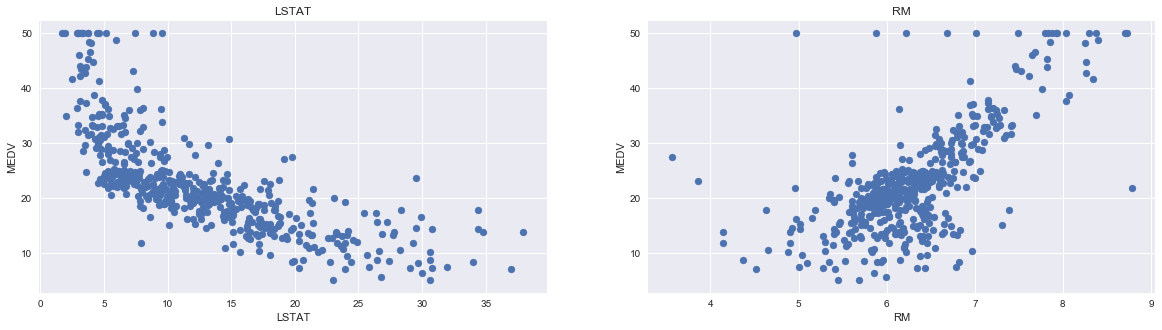

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM'] # here we are taking RM AND LSTAT Feaiutures
target = bos2['MEDV']   # here we are taking target ase the MEDV
 
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos2[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Step -9 Preparing the data for training the model
We concatenate the LSTAT and RM columns using np provided by the numpy library.

In [11]:
X = pd.DataFrame(np.c_[bos2['LSTAT'], bos2['RM']], columns = ['LSTAT','RM'])
Y = bos2['MEDV']

# Step- 10 Splitting the data into training and testing sets

Next, we split the data into training and testing sets.We train the model with 80% of the samples and test with the remaining 20%.

We do this to assess the model’s performance on unseen data. 

To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.


In [14]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# Step-11 Training and testing the model

We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Step-12 Model evaluation
We will evaluate our model using RMSE and R2-score.

In [16]:
import sklearn 

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = sklearn.metrics. r2_score (Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = sklearn.metrics. r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954
